1. Import modules

In [ ]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv ("/content/drive/My Drive/Colab Notebooks/CDSS/Data Folder/creditcard_numerical.csv")
df2 = df.drop(['CLIENTNUM'], axis = 1)

df2.head()

Mounted at /content/drive


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,2,5,3,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,2,4,1,4,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,6,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df2.Attrition_Flag.unique()

array([0, 1])

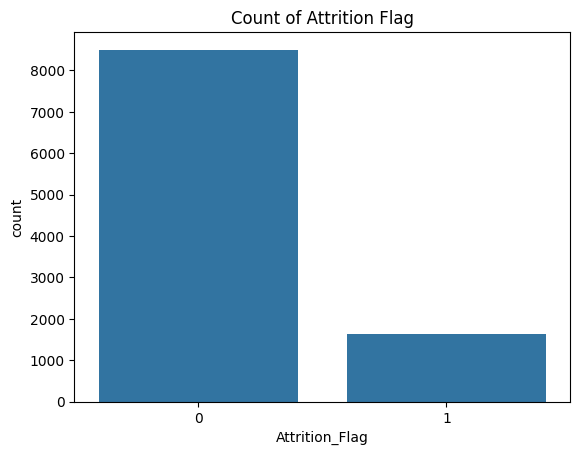

In [ ]:
import seaborn as sns
sns.countplot(data=df2, x='Attrition_Flag')
plt.title('Count of Attrition Flag')
plt.show()

In [ ]:
print(df2.groupby('Attrition_Flag').size())

Attrition_Flag
0    8500
1    1627
dtype: int64


2. Split the dataset into testing and training sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.loc[:,df2.columns != 'Attrition_Flag'], df2['Attrition_Flag'],
stratify=df2['Attrition_Flag'], random_state=66)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

3. Split the features and target variables

In [ ]:
features = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

X = df2[features] #input
y = df2['Attrition_Flag'] #target

print(X)
print(y)

       Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0                45       1                3                1               2   
1                49       2                5                3               1   
2                51       1                3                3               2   
3                40       2                4                1               4   
4                40       1                3                6               2   
...             ...     ...              ...              ...             ...   
10122            50       1                2                3               1   
10123            41       1                2                7               3   
10124            44       2                1                1               2   
10125            30       1                2                3               4   
10126            43       2                2                3               2   

       Income_Category  Car

4. Model evaluation using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.946


The accuracy of training set is 100% and testing set is 71.40%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will add a max_depth= 3 (limiting the depth/ branching of tree).

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.942
Accuracy on test set: 0.931


5. Feature Importance in Decision Trees

In [ ]:
# for all 19 variables, excluded target variable
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.01326054 0.         0.         0.         0.         0.
 0.         0.         0.09129888 0.         0.01297967 0.00263293
 0.25550497 0.         0.02158132 0.14779785 0.40395628 0.05098757
 0.        ]


6. Visualization of feature importance

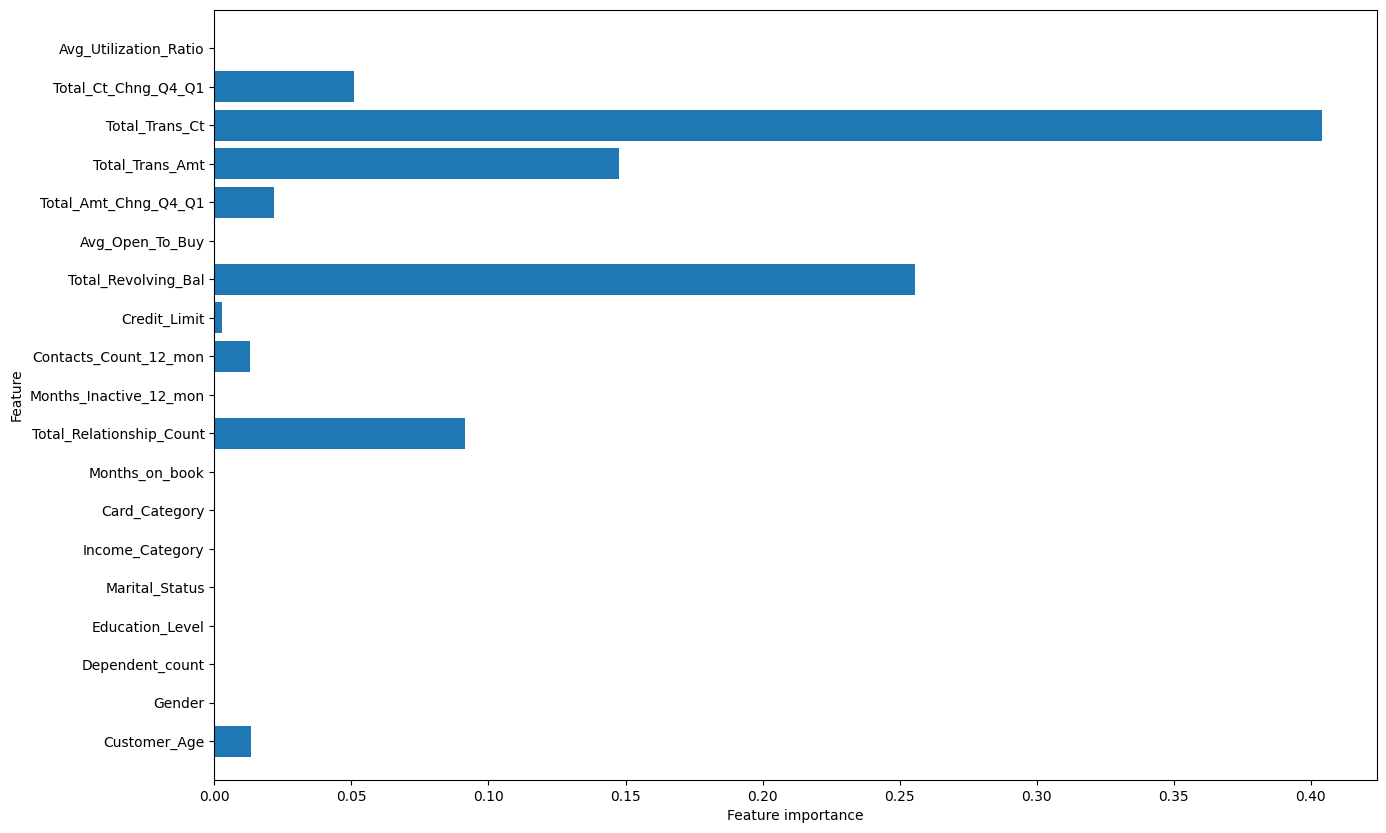

In [ ]:
# feature importance falls under diagnostic analytics
# decision tree falls under predictive analytics
def plot_feature_importances_creditcard(model):
    plt.figure(figsize=(15,10)) # width and height
    n_features = 19  #total number of input features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features) # y-axis labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_creditcard(tree)

In [ ]:
important_features = ['Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Credit_Limit', 'Contacts_Count_12_mon', 'Total_Relationship_Count', 'Customer_Age']

f = df2[important_features] #input
t = df2['Attrition_Flag'] #target

print(f)
print(t)

       Total_Ct_Chng_Q4_Q1  Total_Trans_Ct  Total_Amt_Chng_Q4_Q1  \
0                    1.625              42                 1.335   
1                    3.714              33                 1.541   
2                    2.333              20                 2.594   
3                    2.333              20                 1.405   
4                    2.500              28                 2.175   
...                    ...             ...                   ...   
10122                0.857             117                 0.703   
10123                0.683              69                 0.804   
10124                0.818              60                 0.819   
10125                0.722              62                 0.535   
10126                0.649              61                 0.703   

       Total_Revolving_Bal  Credit_Limit  Contacts_Count_12_mon  \
0                      777       12691.0                      3   
1                      864        8256.0         

7. Create decision tree using important features

In [ ]:
# Create and fit the decision tree
# criterion
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree2.png')


True

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

tree_rules = export_text(clf_dt, feature_names=important_features)
print(tree_rules)

|--- Total_Trans_Ct <= 54.50
|   |--- Total_Revolving_Bal <= 613.50
|   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.65
|   |   |   |--- class: 1
|   |   |--- Total_Ct_Chng_Q4_Q1 >  0.65
|   |   |   |--- class: 0
|   |--- Total_Revolving_Bal >  613.50
|   |   |--- Total_Relationship_Count <= 2.50
|   |   |   |--- class: 1
|   |   |--- Total_Relationship_Count >  2.50
|   |   |   |--- class: 0
|--- Total_Trans_Ct >  54.50
|   |--- Total_Revolving_Bal <= 581.50
|   |   |--- Total_Trans_Ct <= 65.50
|   |   |   |--- class: 0
|   |   |--- Total_Trans_Ct >  65.50
|   |   |   |--- class: 0
|   |--- Total_Revolving_Bal >  581.50
|   |   |--- Total_Revolving_Bal <= 2414.50
|   |   |   |--- class: 0
|   |   |--- Total_Revolving_Bal >  2414.50
|   |   |   |--- class: 0

